In [1]:
print("Kernel is working")

Kernel is working


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the credit card fraud dataset
print("Loading dataset...")
df = pd.read_csv('../data/raw/creditcard.csv')

# Basic dataset information
print("✅ Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"Total Transactions: {df.shape[0]:,}")
print(f"Features: {df.shape[1]}")

print("\n📊 Column Names:")
print(df.columns.tolist())

Loading dataset...
✅ Dataset loaded successfully!
Dataset Shape: (284807, 31)
Total Transactions: 284,807
Features: 31

📊 Column Names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [3]:
# Analyze fraud distribution
print("🔍 FRAUD ANALYSIS")
print("=" * 50)

# Class distribution
fraud_count = df['Class'].value_counts()
print("Transaction Distribution:")
print(f"Legitimate (Class 0): {fraud_count[0]:,} ({fraud_count[0]/len(df)*100:.2f}%)")
print(f"Fraudulent (Class 1): {fraud_count[1]:,} ({fraud_count[1]/len(df)*100:.2f}%)")

# Amount analysis
print(f"\n💰 TRANSACTION AMOUNTS:")
print(f"Legitimate - Average: ${df[df['Class']==0]['Amount'].mean():.2f}")
print(f"Fraudulent - Average: ${df[df['Class']==1]['Amount'].mean():.2f}")
print(f"Overall Range: ${df['Amount'].min():.2f} to ${df['Amount'].max():,.2f}")

# Time analysis
print(f"\n⏰ TIME ANALYSIS:")
print(f"Dataset covers: {df['Time'].max()/3600:.1f} hours")
print(f"Time range: {df['Time'].min():.0f} to {df['Time'].max():.0f} seconds")

# First look at fraud transactions
print(f"\n🚨 SAMPLE FRAUD TRANSACTIONS:")
fraud_samples = df[df['Class']==1].head(3)[['Time', 'Amount', 'Class']]
print(fraud_samples)

🔍 FRAUD ANALYSIS
Transaction Distribution:
Legitimate (Class 0): 284,315 (99.83%)
Fraudulent (Class 1): 492 (0.17%)

💰 TRANSACTION AMOUNTS:
Legitimate - Average: $88.29
Fraudulent - Average: $122.21
Overall Range: $0.00 to $25,691.16

⏰ TIME ANALYSIS:
Dataset covers: 48.0 hours
Time range: 0 to 172792 seconds

🚨 SAMPLE FRAUD TRANSACTIONS:
        Time  Amount  Class
541    406.0    0.00      1
623    472.0  529.00      1
4920  4462.0  239.93      1


/var/folders/vx/qgwkdqhn6ysbqq60zjlhqzxr0000gn/T/ipykernel_94435/963234617.py:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']],


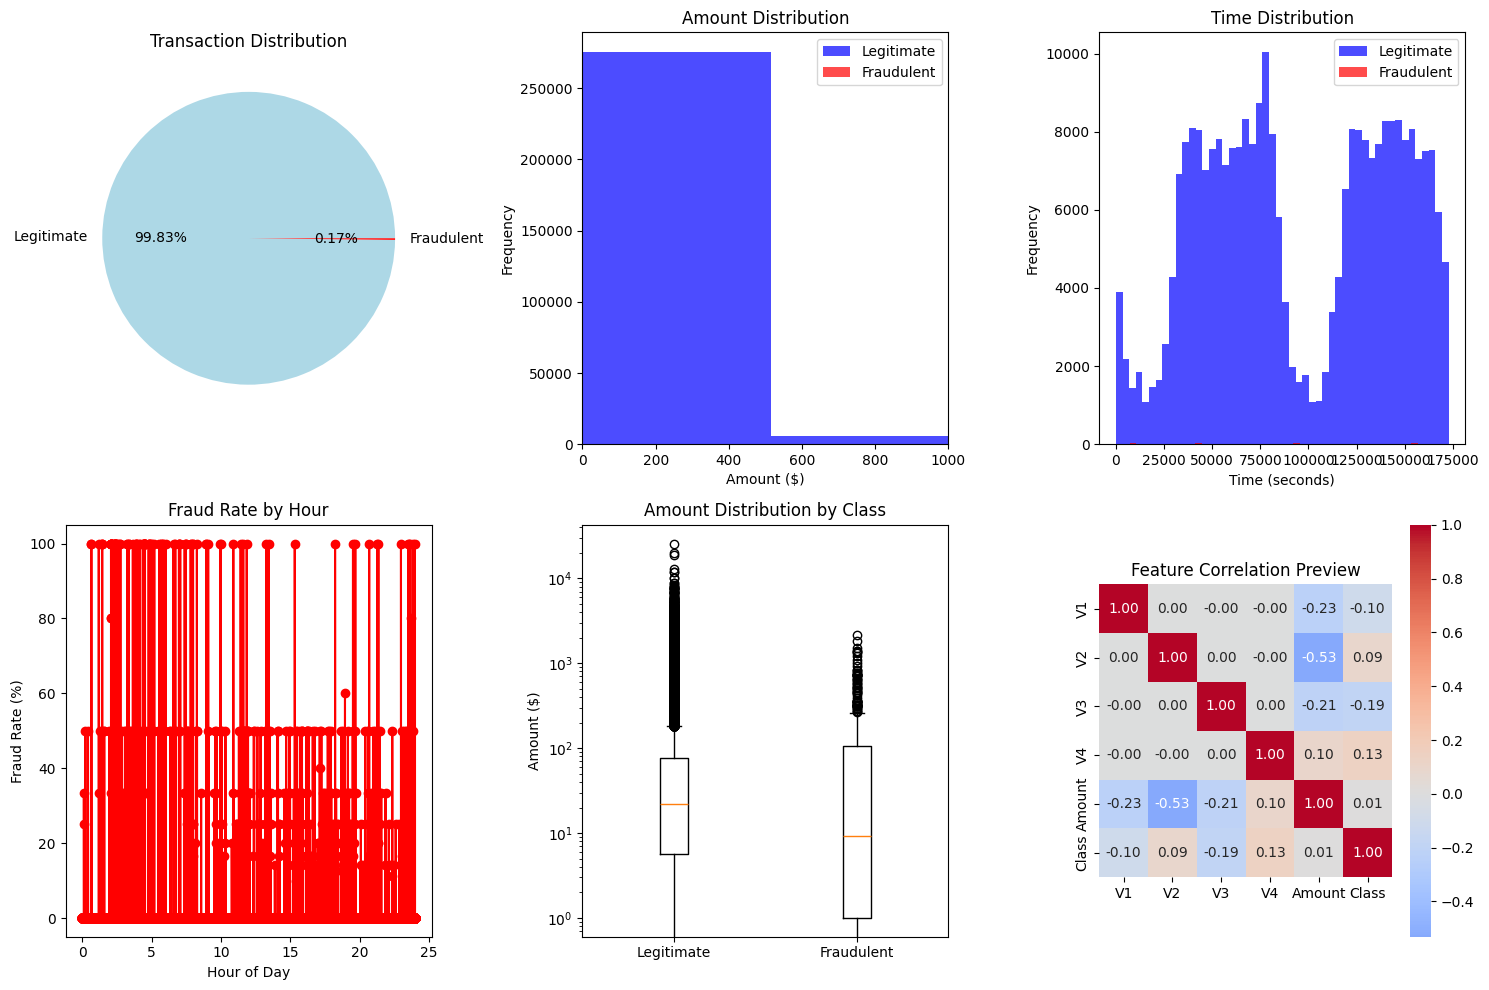

📈 Key Insights for ML Model:
• Highly imbalanced dataset (0.17% fraud)
• Fraudulent transactions slightly higher amounts
• Need to handle class imbalance in ML model
• V1-V28 features are pre-processed (PCA)


In [4]:
# Create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# 1. Fraud distribution pie chart
plt.subplot(2, 3, 1)
fraud_count = df['Class'].value_counts()
plt.pie(fraud_count.values, labels=['Legitimate', 'Fraudulent'], 
        autopct='%1.2f%%', colors=['lightblue', 'red'])
plt.title('Transaction Distribution')

# 2. Amount distribution by class
plt.subplot(2, 3, 2)
plt.hist(df[df['Class']==0]['Amount'], bins=50, alpha=0.7, label='Legitimate', color='blue')
plt.hist(df[df['Class']==1]['Amount'], bins=50, alpha=0.7, label='Fraudulent', color='red')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.title('Amount Distribution')
plt.legend()
plt.xlim(0, 1000)  # Focus on typical transaction range

# 3. Time distribution
plt.subplot(2, 3, 3)
plt.hist(df[df['Class']==0]['Time'], bins=50, alpha=0.7, label='Legitimate', color='blue')
plt.hist(df[df['Class']==1]['Time'], bins=50, alpha=0.7, label='Fraudulent', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Time Distribution')
plt.legend()

# 4. Fraud by hour of day
plt.subplot(2, 3, 4)
df['Hour'] = (df['Time'] / 3600) % 24
fraud_by_hour = df.groupby('Hour')['Class'].mean() * 100
plt.plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', color='red')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')
plt.title('Fraud Rate by Hour')

# 5. Amount boxplot
plt.subplot(2, 3, 5)
plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']], 
            labels=['Legitimate', 'Fraudulent'])
plt.ylabel('Amount ($)')
plt.title('Amount Distribution by Class')
plt.yscale('log')

# 6. Feature correlation preview
plt.subplot(2, 3, 6)
# Sample correlation for first few V features
corr_features = ['V1', 'V2', 'V3', 'V4', 'Amount', 'Class']
corr_matrix = df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Preview')

plt.tight_layout()
plt.show()

print("📈 Key Insights for ML Model:")
print("• Highly imbalanced dataset (0.17% fraud)")
print("• Fraudulent transactions slightly higher amounts")
print("• Need to handle class imbalance in ML model")
print("• V1-V28 features are pre-processed (PCA)")